In [1]:
import os
import json
import pandas as pd

from PIL import Image

In [2]:
img_dir = 'fashion-dataset/images'
new_img_dir = 'fashion-dataset/new-images/train'
styles = 'fashion-dataset/styles.csv'

In [3]:
num = 1525

sample_img = f'{img_dir}/{num}.jpg'
sample_new_img = f'{new_img_dir}/{num}.jpg' 

In [4]:
def info_img(input_path):
    with Image.open(input_path) as img:
        print('画像の形式:', img.format)
        print('画像のサイズ:', img.size)
        print('画像のモード:', img.mode)

In [5]:
def square_img(input_path):
   with Image.open(input_path) as img:
      x, y, = 0, 0
      rgb = img.getpixel((x, y))
      width, height = img.size
      new_size = max(width, height)
      new_img = Image.new("RGB", (new_size, new_size), (rgb))
      new_img.paste(img, ((new_size - width) // 2, (new_size - height) // 2))
      new_img = new_img.resize((1200, 1200))
      return new_img

In [6]:
file_count = sum([1 for file in os.listdir(img_dir) if file.endswith(".jpg")])
print(f'imagesのjpgファイル数: {file_count}')

imagesのjpgファイル数: 44441


In [7]:
info_img(sample_img)

画像の形式: JPEG
画像のサイズ: (1800, 2400)
画像のモード: RGB


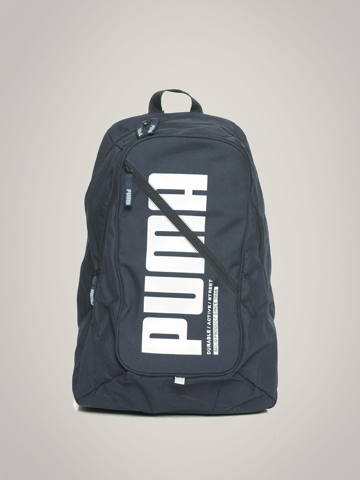

In [8]:
sample_img_open = Image.open(sample_img)
display(sample_img_open.resize((360, 480)))

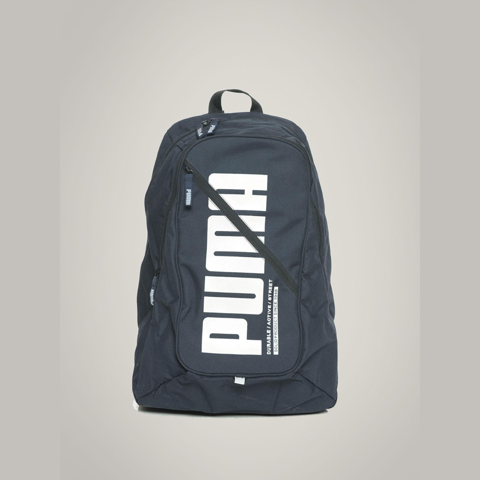

In [9]:
sample_square_img_open = square_img(sample_img)
display(sample_square_img_open.resize((480, 480)))

In [9]:
styles_df = pd.read_csv(styles)
styles_df = styles_df.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1)
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [10]:
file_num = os.listdir(img_dir)
styles_df['fileName'] = styles_df['id'].astype(str)
styles_df['fileName'] = styles_df['fileName'] + '.jpg'
styles_df = styles_df[styles_df['fileName'].isin(file_num)].sort_values('id')
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,fileName
12904,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.0,Sports,Nike Sahara Team India Fanwear Round Neck Jersey,1163.jpg
12627,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015.0,Sports,Nike Men Blue T20 Indian Cricket Jersey,1164.jpg
16357,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013.0,Sports,Nike Mean Team India Cricket Jersey,1165.jpg
9208,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010.0,Casual,Puma Deck Navy Blue Backpack,1525.jpg
33222,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010.0,Sports,Puma Big Cat Backpack Black,1526.jpg


In [11]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44441 entries, 12904 to 6501
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44441 non-null  int64  
 1   gender              44441 non-null  object 
 2   masterCategory      44441 non-null  object 
 3   subCategory         44441 non-null  object 
 4   articleType         44441 non-null  object 
 5   baseColour          44426 non-null  object 
 6   season              44420 non-null  object 
 7   year                44440 non-null  float64
 8   usage               44124 non-null  object 
 9   productDisplayName  44434 non-null  object 
 10  fileName            44441 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.1+ MB


In [12]:
styles_df = styles_df.dropna()
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44094 entries, 12904 to 6501
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44094 non-null  int64  
 1   gender              44094 non-null  object 
 2   masterCategory      44094 non-null  object 
 3   subCategory         44094 non-null  object 
 4   articleType         44094 non-null  object 
 5   baseColour          44094 non-null  object 
 6   season              44094 non-null  object 
 7   year                44094 non-null  float64
 8   usage               44094 non-null  object 
 9   productDisplayName  44094 non-null  object 
 10  fileName            44094 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [13]:
shoes_df = styles_df[styles_df['subCategory'] == 'Shoes']
shoes_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,fileName
7037,1541,Men,Footwear,Shoes,Sports Shoes,White,Fall,2010.0,Sports,Puma Men's Ballistic Spike White Green Shoe,1541.jpg
28175,1542,Men,Footwear,Shoes,Sports Shoes,White,Fall,2010.0,Sports,Puma Men's Ballistic Rubber Shoe,1542.jpg
31478,1543,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2010.0,Casual,Puma Men Basket-Biz Sneaker,1543.jpg
31642,1544,Men,Footwear,Shoes,Casual Shoes,White,Fall,2010.0,Casual,Puma Men's Basket Bump Sneaker,1544.jpg
27919,1545,Men,Footwear,Shoes,Casual Shoes,White,Fall,2010.0,Casual,Puma Men's Speed Cat Shoe,1545.jpg


In [14]:
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7037 to 34690
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7324 non-null   int64  
 1   gender              7324 non-null   object 
 2   masterCategory      7324 non-null   object 
 3   subCategory         7324 non-null   object 
 4   articleType         7324 non-null   object 
 5   baseColour          7324 non-null   object 
 6   season              7324 non-null   object 
 7   year                7324 non-null   float64
 8   usage               7324 non-null   object 
 9   productDisplayName  7324 non-null   object 
 10  fileName            7324 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 686.6+ KB


In [15]:
df = shoes_df[['fileName', 'productDisplayName']]
df = df.rename(columns={'fileName': 'file_name', 'productDisplayName': 'text'})
df.head()

,file_name,text
7037,1541.jpg,Puma Men's Ballistic Spike White Green Shoe
28175,1542.jpg,Puma Men's Ballistic Rubber Shoe
31478,1543.jpg,Puma Men Basket-Biz Sneaker
31642,1544.jpg,Puma Men's Basket Bump Sneaker
27919,1545.jpg,Puma Men's Speed Cat Shoe


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 7037 to 34690
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7324 non-null   object
 1   text       7324 non-null   object
dtypes: object(2)
memory usage: 171.7+ KB


In [16]:
#for name in df['file_name']:
#    img = f'{img_dir}/{name}'
#    new_img = square_img(img)
#    new_img.save(f'{new_img_dir}/{name}')
#    print(name)

In [17]:
#file_count = sum([1 for file in os.listdir(new_img_dir) if file.endswith(".jpg")])
#print(f'new_imagesのjpgファイル数: {file_count}')

In [18]:
#sample_new_img_open = Image.open(sample_new_img)
#display(sample_new_img_open.resize((480, 480)))

In [19]:
#with open(f'{new_img_dir}/metadata.jsonl', 'w') as f:
#    for row in df.itertuples(index=False):
#        json.dump({'file_name': row[0], 'text': row[1]}, f)
#        f.write('\n')

In [20]:
#with open(f'{new_img_dir}/metadata.jsonl', 'r') as f:
#    for line in f:
#        data = json.loads(line)
#        print(data)